In [47]:
import scanpy as sc
import scvelo as scv
import os
from anndata import AnnData as ad
import pandas as pd

Read dataset 

In [24]:
adata = scv.datasets.dentategyrus_lamanno("../datasets/raw/dentategyrus.loom")

Save counts 

In [25]:
adata.layers["X_counts"] = adata.X.copy()

HVG selection

In [26]:
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",
    n_top_genes=2000,
    layer="X_counts",
    subset=True,
)

Preprocess

In [27]:
sc.pp.log1p(adata)

In [28]:
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

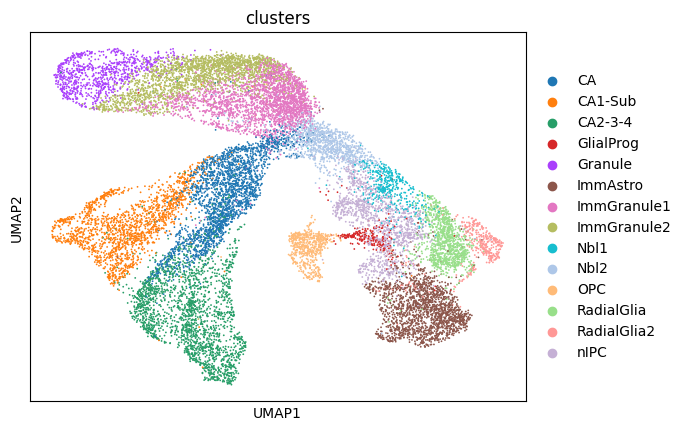

In [29]:
sc.pl.umap(adata, color=["clusters"])

In [36]:
adata.obs = adata.obs.rename({"clusters": "cell_type"})

In [37]:
adata

AnnData object with n_obs × n_vars = 18213 × 2000
    obs: 'Age', 'clusters'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'clusters_colors', 'hvg', 'log1p', 'pca', 'neighbors', 'umap'
    obsm: 'X_tsne', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'X_counts'
    obsp: 'distances', 'connectivities'

Save

In [32]:
ad.write_h5ad(adata, "../datasets/processed/dentategyrus.h5ad")

In [40]:
adata.obs["lib_size"] = adata.layers["X_counts"].A.sum(1)

In [44]:
adata.obs.lib_size

CellID
10X83_2:AAACGGGGTCTCTTTAx    1382.0
10X83_2:AACCATGGTTCAACCAx    1308.0
10X83_2:AACACGTTCTGAAAGAx    3705.0
10X83_2:AAAGATGCATTGAGCTx     671.0
10X83_2:AACCATGTCTACTTACx     795.0
                              ...  
10X84_3:TTTCCTCCACCATCCTx     473.0
10X84_3:TTTGTCACATGAAGTAx    4695.0
10X84_3:TTTCCTCCACGGTAAGx     635.0
10X84_3:TTTGTCAAGCGTCAAGx     536.0
10X84_3:TTTCCTCGTGAAAGAGx     439.0
Name: lib_size, Length: 18213, dtype: float32

In [51]:
adata.obs.groupby("clusters").lib_size.mean()

clusters
CA              883.500854
CA1-Sub        1971.923096
CA2-3-4        3844.034180
GlialProg       496.240173
Granule        1498.899170
ImmAstro       1013.662170
ImmGranule1     533.363831
ImmGranule2     820.424500
Nbl1            482.947479
Nbl2            420.086731
OPC             621.234985
RadialGlia      616.171631
RadialGlia2     842.445862
nIPC            892.892700
Name: lib_size, dtype: float32